In [1]:
import sys
sys.path.append('../python_packages_static/')
import pandas as pd
import pyemu
import os, glob
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import numpy as np

### NOTE: Make sure  `run_ensemble` is set appropriately - If `run_ensemble` is set to `True`, local runs are performed. If `run_ensemble` set to `False`results from the journal article are used. 

In [2]:
run_ensemble=False

In [3]:
if run_ensemble == True:
    wkdir = '../run_data/' # we need to read from this directory to get the residuals from the noptmax 0 run
else:
    wkdir = '../output/parallel/' # we need to read from this directory to get the residuals from the noptmax 0 run
output_dir = '../run_data' # this is the folder we will actually use to set up PEST++ runs
pstroot='prior_mc_wide'

In [4]:
ens = pd.read_csv(os.path.join(wkdir,'{}.0.obs.csv'.format(pstroot)), index_col=0)

In [5]:
phi = pd.read_csv(os.path.join(wkdir,'{}.phi.actual.csv'.format(pstroot)))

In [6]:
parens = pd.read_csv(os.path.join(wkdir, '{}.0.par.csv'.format(pstroot)), index_col=0)

C:\ProgramData\Anaconda3\envs\neversink\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
parens

,wel__:0_usecol:3_idx0:0_idx1:225_idx2:185,wel__:0_usecol:3_idx0:0_idx1:556_idx2:459,wel__:0_usecol:3_idx0:3_idx1:260_idx2:180,wel__:0_usecol:3_idx0:2_idx1:249_idx2:181,wel__:0_usecol:3_idx0:1_idx1:249_idx2:536,wel__:0_usecol:3_idx0:1_idx1:248_idx2:536,wel__:0_usecol:3_idx0:0_idx1:299_idx2:255,wel__:0_usecol:3_idx0:3_idx1:236_idx2:185,wel__:0_usecol:3_idx0:0_idx1:248_idx2:181,wel__:0_usecol:3_idx0:3_idx1:237_idx2:198,...,sfrk_200065969,sfrk_200250814,sfrk_200027277,sfrk_700040140,sfrk_200308941,sfrk_700050332,sfrk_200173393,sfrk_700021654,sfrk_700020798,sfrk_700050017
real_name,,,,,,,,,,,,,,,,,,,,,
0,1.131940,1.050270,0.925092,1.004850,1.190890,1.030110,1.093650,0.906845,1.036420,1.002920,...,0.817229,1.179020,1.392090,1.075630,0.640235,0.460214,2.180500,0.302831,6.613040,5.310940
1,0.964115,0.998230,0.946580,0.888467,1.050260,0.904969,0.998112,1.065210,1.042690,0.974670,...,0.340927,0.618212,9.495810,0.202832,0.817942,4.887940,1.919850,0.438854,3.688670,1.978360
2,0.935386,0.966759,1.082880,0.987447,0.931025,1.121370,0.962847,0.846860,1.062520,0.997255,...,0.306953,1.654090,2.237110,0.727079,0.167653,0.755582,2.337580,3.403400,0.167582,0.565267
3,1.011890,1.144000,1.051760,0.892756,1.085580,0.955911,1.087550,1.033170,1.200000,0.862943,...,0.543204,4.526880,0.527462,0.991547,2.449530,1.480130,0.318217,1.510950,0.379445,1.186500
4,0.978990,0.887770,0.957323,1.002880,0.822460,0.953946,1.013440,1.009380,0.832213,0.945799,...,0.100000,1.743240,0.761709,0.110102,5.270970,1.241450,1.207280,1.074280,8.162120,1.809600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.174210,1.200000,0.969112,1.009030,0.907120,1.050090,0.973299,1.174230,0.853555,0.949073,...,1.900350,1.657520,3.586750,0.483083,0.884094,1.722120,0.547703,0.797109,0.465180,1.759320
496,1.018850,0.915408,0.986458,1.193830,0.830330,1.041410,1.066250,0.963832,0.865491,0.963495,...,0.861726,1.850880,0.497646,3.414700,0.158885,2.752150,0.403229,1.990400,0.756157,0.565936
497,0.820337,0.949329,1.015610,1.059570,0.906656,1.155650,1.109520,1.049260,1.043270,0.847999,...,2.150230,6.129030,0.388650,1.689460,0.300283,0.106400,0.100000,0.987218,1.332670,0.272062


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

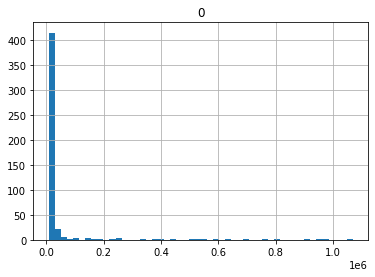

In [8]:
phi.T.dropna().iloc[6:].hist(bins=50)

In [9]:
phi

,iteration,total_runs,mean,standard_deviation,min,max,0,1,2,3,...,490,491,492,493,494,495,496,497,498,base
0,0,488,47476.6,131484,7767.9,1069100.0,10492.9,19280.2,23318.1,20296.3,...,16128.7,25895.6,198765,11095.5,29629,18315.3,24858,12493,13800.2,13291.1


In [10]:
# adjust threshold based on histogram
phi_threshold_for_keeping =  22500 # prior_mc_wide phi cutoff used in journal article
allphi=phi.T.dropna().iloc[6:].copy()
allphi.columns=['phi']
keepreals = allphi.loc[allphi.phi<phi_threshold_for_keeping].index
keepreals

Index(['0', '1', '3', '6', '8', '10', '11', '12', '13', '14',
       ...
       '486', '487', '488', '489', '490', '493', '495', '497', '498', 'base'],
      dtype='object', length=362)

array([[<AxesSubplot:title={'center':'phi'}>]], dtype=object)

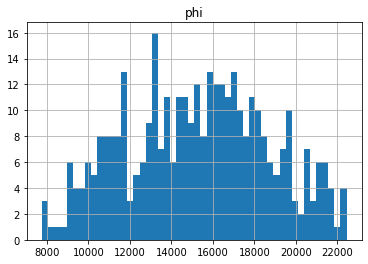

In [11]:
allphi.loc[keepreals].hist(bins=50)

In [12]:
# truncate the ensemble to only keepreals (based on phi)
ens = ens.loc[keepreals]
# set percent_discrepancy to absolute value because we don't care about the sign
ens.perc_disc = ens.perc_disc.apply(lambda x: np.abs(x))

In [13]:
# further truncate to eliminate bad mass balance runs 
print(len(ens))
ens = ens.loc[ens.perc_disc<0.01]
ens

362


,q_1436500,q_1366650,h_414525074360601,h_o10577,h_o10942,h_o11068,h_o5124,h_o6269,h_o7421,h_o8073,...,land_surf_obs_500_400,land_surf_obs_500_450,land_surf_obs_500_500,land_surf_obs_550_400,land_surf_obs_550_450,land_surf_obs_550_500,land_surf_obs_600_350,land_surf_obs_600_400,land_surf_obs_600_450,land_surf_obs_650_450
0,90345,141460,357.445,205.598,154.991,110.034,343.276,496.051,158.172,207.606,...,408.722,217.025,172.372,335.600,169.674,333.056,419.345,276.963,154.978,245.355
6,92374,142090,358.966,187.901,155.435,116.579,337.165,469.984,141.620,197.613,...,387.227,216.439,162.279,317.244,168.733,330.109,408.051,271.945,154.780,235.552
8,98564,144990,357.659,208.014,155.365,114.931,340.993,501.693,161.015,210.019,...,409.272,217.074,173.620,342.087,172.775,335.556,430.249,280.177,155.443,247.152
10,95471,155710,359.025,204.564,156.535,114.496,341.311,480.311,149.395,200.875,...,402.901,216.637,163.218,321.532,164.221,330.809,411.532,273.546,158.565,239.708
11,97048,153360,358.708,206.126,155.358,112.359,342.751,499.193,159.517,207.311,...,409.798,217.784,174.473,332.115,168.680,332.941,419.530,277.317,154.699,249.977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,93192,130940,359.161,197.485,156.008,116.080,339.585,477.031,144.911,198.906,...,396.995,216.523,166.178,321.503,169.581,330.480,409.893,273.005,154.222,238.456
490,102270,158490,359.210,208.796,153.987,110.143,349.477,502.844,155.989,206.205,...,412.936,217.344,176.684,335.147,169.085,336.752,424.474,276.916,154.485,246.801
495,99256,154640,359.336,190.270,154.709,110.020,336.575,472.105,142.177,197.786,...,388.964,217.018,169.633,320.672,173.938,330.114,410.811,272.382,156.462,235.586
497,96472,139530,359.565,197.507,157.604,118.039,340.832,476.033,145.467,198.851,...,394.595,216.485,170.021,320.634,173.805,330.641,410.506,273.477,156.505,239.664


In [14]:
# reset keepreals based now both on phi and mass balance
keepreals = ens.index.values

array([[<AxesSubplot:title={'center':'phi'}>]], dtype=object)

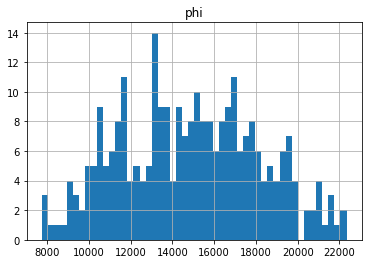

In [15]:
# look at phi again
allphi.loc[keepreals].hist(bins=50)

In [16]:
allphi.loc[keepreals]

,phi
0,10492.9
6,15348.5
8,10518.5
10,16805.3
11,14316.2
...,...
489,11549.0
490,16128.7
495,18315.3
497,12493.0


In [17]:
pst = pyemu.Pst(os.path.join(wkdir,'{}.pst'.format(pstroot)))

In [18]:
q50 = pyemu.helpers.calc_observation_ensemble_quantiles(ens, pst, [.5, .9])

In [19]:
obs = pst.observation_data

In [20]:
obs

,obsnme,obsval,weight,obgnme,extra
obsnme,,,,,
q_1436500,q_1436500,116217.231560,0.000982,flux,NaN
q_1366650,q_1366650,124046.273310,0.002762,flux,NaN
h_414525074360601,h_414525074360601,357.182016,0.090658,head,NaN
h_o10577,h_o10577,203.903379,0.090658,head,NaN
h_o10942,h_o10942,150.660417,0.090658,head,NaN
...,...,...,...,...,...
land_surf_obs_550_500,land_surf_obs_550_500,365.440000,0.435489,land_surface,NaN
land_surf_obs_600_350,land_surf_obs_600_350,443.410000,0.435489,land_surface,NaN
land_surf_obs_600_400,land_surf_obs_600_400,300.950000,0.435489,land_surface,NaN


In [21]:
plot_all_pdfs=False # flag whether to plot all the histograms

In [22]:
if plot_all_pdfs==True:
    with PdfPages('../figures/{}_obs_hist_plots.pdf'.format(pstroot)) as outpdf:
        for cob in obs.obsnme.values:
            plt.figure()
            ens[cob].hist(bins=50)
            obsval = obs.loc[cob].obsval
            plt.axvline(obsval, color='orange')
            plt.title(cob)
            outpdf.savefig()
            plt.close('all')

# trim the parameters to the acceptable PHI ensemble

In [23]:
parens.index = [str(i) for i in parens.index.values]
parens = parens.loc[keepreals]

In [24]:
parens.to_csv(os.path.join(output_dir, 'never_iES_post_MC_parens.csv'))